### Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
sns.set()

### Importing the dataset

In [2]:
train = pd.read_csv('train.csv')

##### It's always a good practise to check what is the type of the data.

In [3]:
type(train)

pandas.core.frame.DataFrame

#### Let's get to know about the data more:

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Shape of our data:

In [5]:
train.shape

(891, 12)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Detailed summary of the dataset:

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### How many males and females are there?

In [8]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

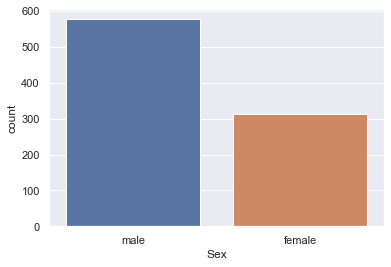

In [9]:
sns.countplot(train['Sex'])

#### How many survived?

In [10]:
train['Survived'].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

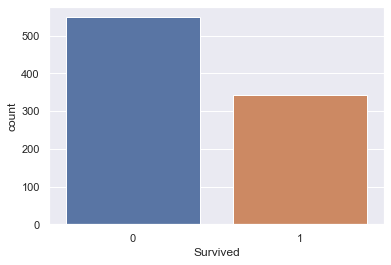

In [11]:
sns.countplot(train['Survived'])

#### Count of male and female survived

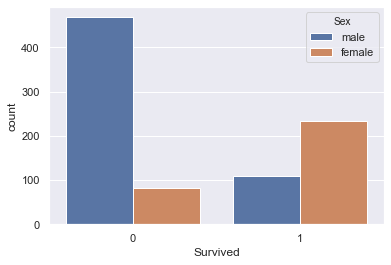

In [12]:
sns.countplot(train['Survived'], hue = 'Sex', data = train)

#### Counts of passengers came from different places

In [13]:
train['Survived'].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

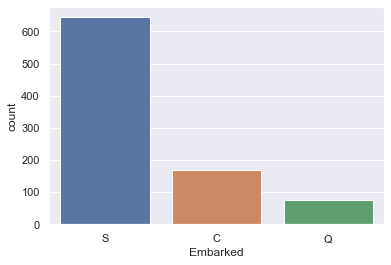

In [14]:
sns.countplot(train['Embarked'])

We can see that most of the passengers came from Southampton.

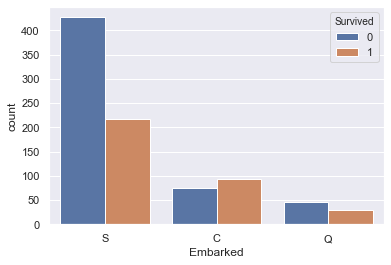

In [15]:
sns.countplot(train['Embarked'], hue = 'Survived', data = train)

This is more meaningful since we can gather an information which depicts that the passengers from Cherbourg survived more with respect to their deaths. 

#### Let's check if there is any NA values in our dataset or not

In [16]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

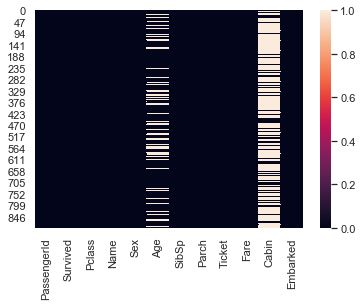

In [17]:
sns.heatmap(train.isna())

If we see the data as by 'Age' then we won't be able to see that where is our NA values. Heatmap also helps us know that is our dataset having NA values or not!

#### Feature Engineering
There are __three main problems__ that missing data causes: missing data can introduce a substantial amount of __bias__, make the handling and analysis of the data more __arduous__, and create reductions in __efficiency.__
To deal with missing values, we've two ways: 

In [18]:
# Remove the whole row:
train.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


As we see, now we've only 183 observations instead of 891 observations. 
We might have lost some important details by deleting the observations!

__Imputation:__ It is process of replacing missing data with substituted values. 
A few of the well known attempts to deal with missing data include: __hot deck__ and __cold deck imputation__; __listwise and pairwise deletion__; __mean imputation__; __regression imputation__; __last observation carried forward__; __stochastic imputation__; and __multiple imputation__.

Right now, we will replace our missing values with either mean or median or mode of the particular column of the dataset such that there's no such change in our particular dataset.

In [19]:
train['Age'].mean()

29.69911764705882

In [20]:
# Using median to replace our missing values:
train['Age'].fillna(train['Age'].median(), inplace = True)

In [21]:
# There's a slight difference in the age.
train['Age'].mean()

29.36158249158249

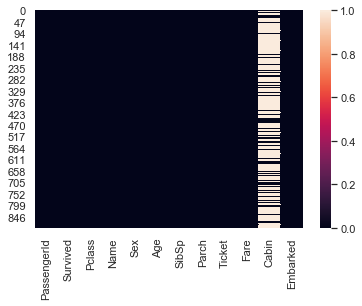

In [22]:
# Let's check if we're still having NA values or not
sns.heatmap(train.isna())

In [23]:
# Let's look how our features are corelated with each other
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


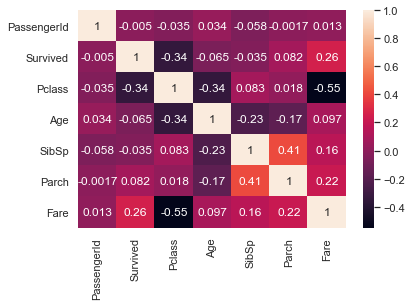

In [24]:
sns.heatmap(train.corr(), annot = True)

In [80]:
X = train[['Pclass', 'Fare', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
y = train[['Survived']]

In [81]:
sex = X['Sex']
sex_dummy = pd.get_dummies(sex)
sex_dummy_final = sex_dummy.iloc[:,0:1]
X['Sex'] = sex_dummy_final

C:\Users\Dazzpool\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [82]:
embarked = X['Embarked']
embarked_dummies = pd.get_dummies(embarked)
embarked_dummies_final = embarked_dummies.iloc[:,0:2]
X[['Cherbourg', 'Queenstown']] = embarked_dummies_final
X.drop('Embarked', axis=1, inplace=True)

C:\Users\Dazzpool\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Dazzpool\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [83]:
pclass = X['Pclass']
pclass_dummies = pd.get_dummies(pclass)
pclass_dummies_final = pclass_dummies.iloc[:,0:2]
X[['pclass1', 'pclass2']] = embarked_dummies_final
X.drop('Pclass', axis=1, inplace=True)

In [84]:
X

,Fare,Sex,Age,SibSp,Parch,Cherbourg,Queenstown,pclass1,pclass2
0,7.2500,0,22.0,1,0,0,0,0,0
1,71.2833,1,38.0,1,0,1,0,1,0
2,7.9250,1,26.0,0,0,0,0,0,0
3,53.1000,1,35.0,1,0,0,0,0,0
4,8.0500,0,35.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
886,13.0000,0,27.0,0,0,0,0,0,0
887,30.0000,1,19.0,0,0,0,0,0,0
888,23.4500,1,28.0,1,2,0,0,0,0
889,30.0000,0,26.0,0,0,1,0,1,0


#### Splitting our data into training and testing dataset

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

#### Importing library for Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
model = LogisticRegression()

In [89]:
#Fitting our model
model.fit(X_train,y_train)

C:\Users\Dazzpool\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
y_pred = model.predict(X_test)

In [91]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1], dtype=int64)

#### Importing Confusion Matrix module

In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
confusion_matrix(y_test, y_pred)

array([[51,  4],
       [10, 25]], dtype=int64)

#### Importing Accuracy score module to check our module accuracy

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(y_test, y_pred)

0.8444444444444444

Well our model accuracy is around 84%